<a href="https://colab.research.google.com/github/neel26desai/dimensionality_reduction/blob/main/Clustering_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel
!pip install hdbscan

# UMAP Clustering

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
#loading the data
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## UMAP dimention reduction

In [ ]:
#applying UMAP to reduce the dimentionalisty to 3 features
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=3,
    random_state=42,
).fit_transform(mnist.data)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
#transforming the embeddings for visualization purpose
df = pd.DataFrame(clusterable_embedding, columns=['x', 'y', 'z'])
df['target'] = mnist.target

In [ ]:
fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='target',
                   template='plotly_dark',
                   color_continuous_scale=px.colors.sequential.Rainbow)
# fig.show()
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker_size=1)


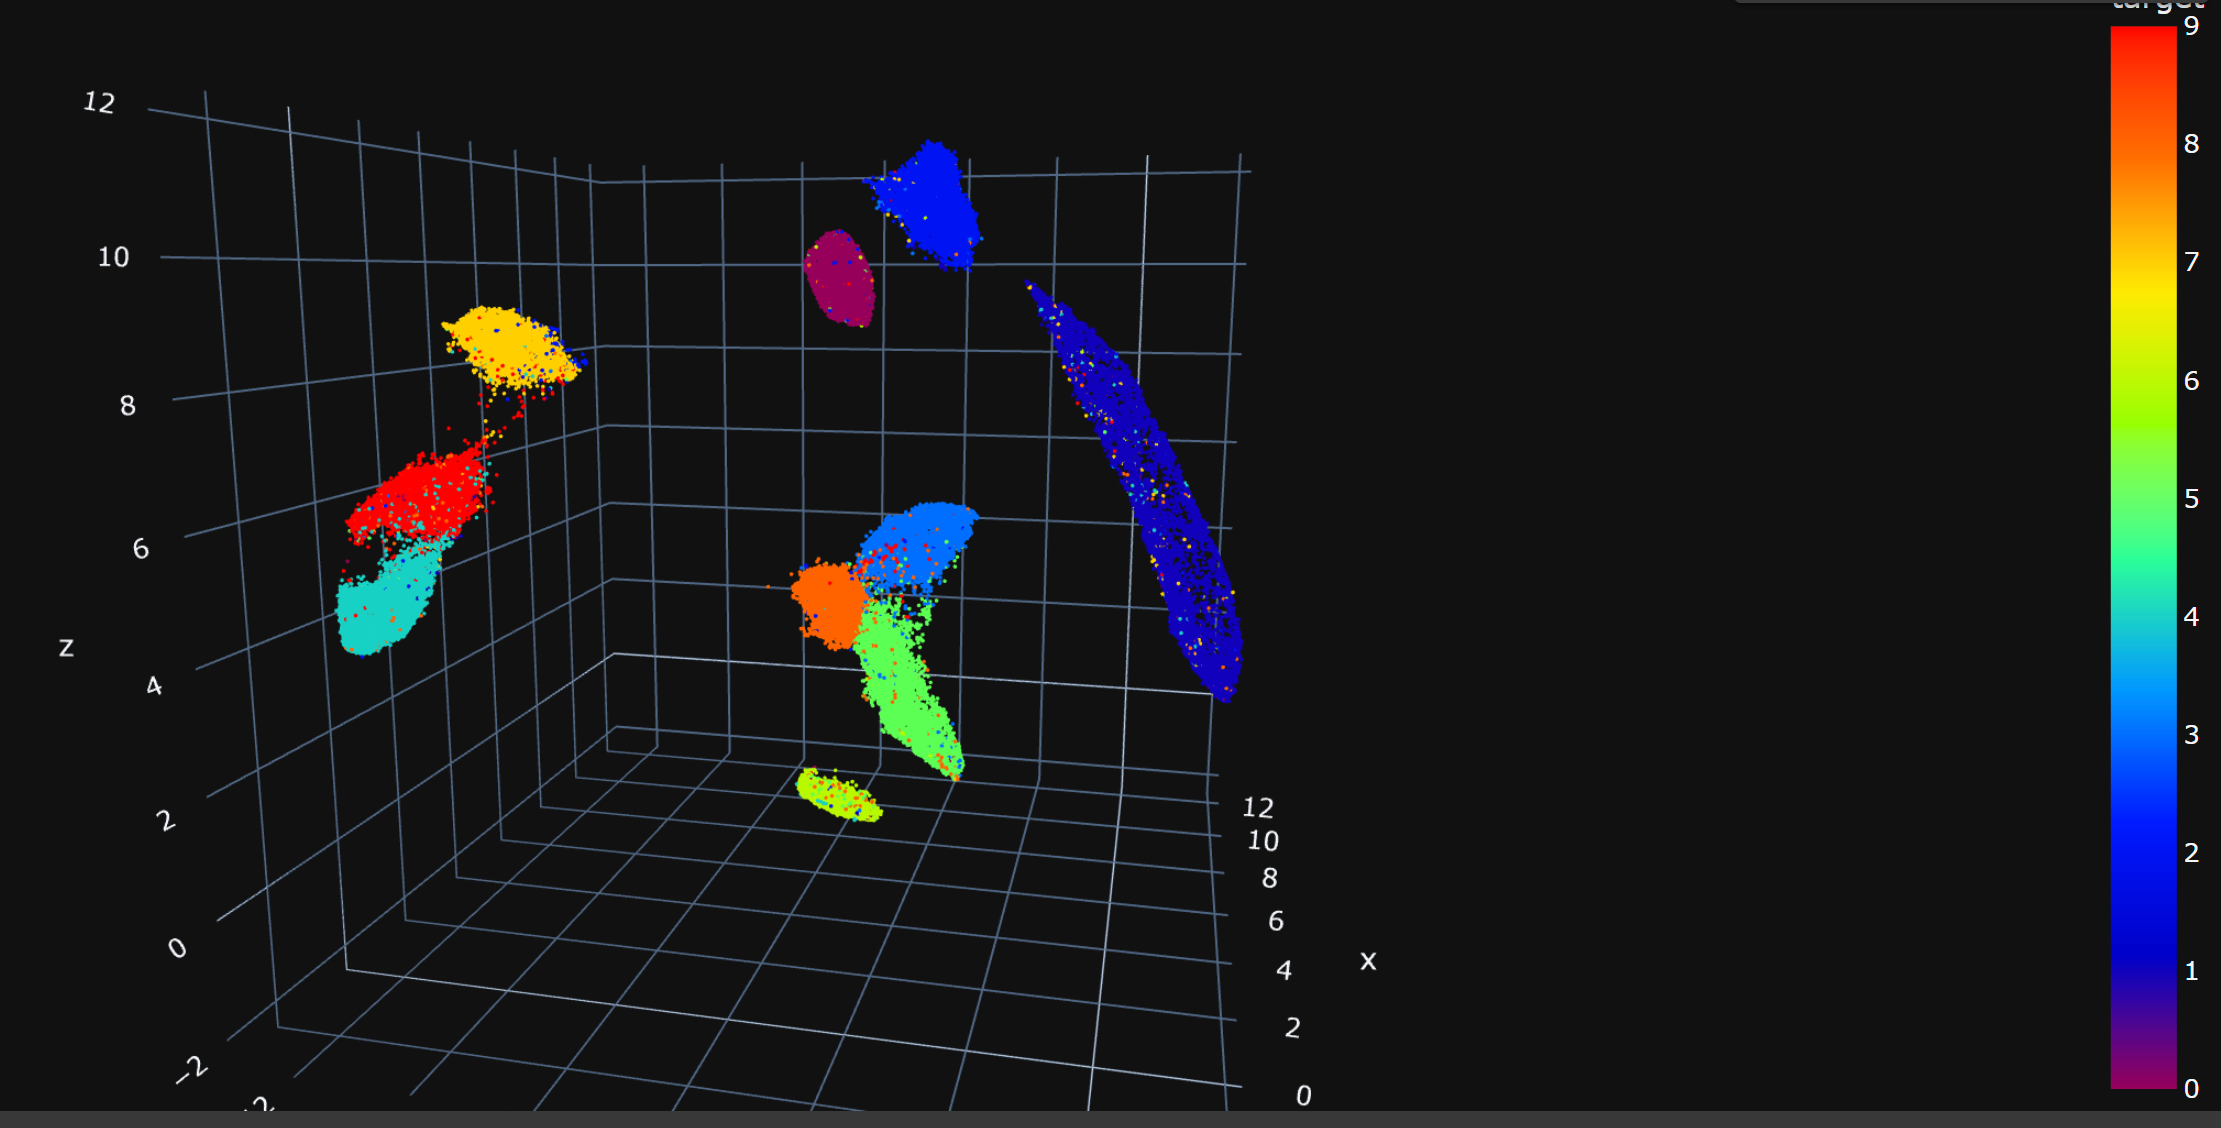

We can see that after applying UMAP we are able to reduce the number of features while peserving the knowledge in the data, as after reduction we can see a cleaar difference between images of different classes.

## Traditional Clustering

In [ ]:
#performing HBase Clustering
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

In [ ]:
df['target'] = labels

In [ ]:
fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='target',
                   template='plotly_dark',
                   color_continuous_scale=px.colors.sequential.Rainbow)
# fig.show()
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker_size=1)


In [ ]:
print('Asjusted Rand Score: ',adjusted_rand_score(mnist.target, labels))
print('Adjusted Mutual Info Score: ',adjusted_mutual_info_score(mnist.target, labels))

Asjusted Rand Score:  0.6548008534529315
Adjusted Mutual Info Score:  0.8258185043419219


# UMAP for Classification Feature Selection

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

from umap import UMAP

In [ ]:
# Generating a Synthetics dataset with 1000 records, 300 features and 3 classes
X, y = make_classification(
    n_samples=1000,
    n_features=300,
    n_informative=250,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=1212,
)


In [ ]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Transformation with UMAP followed by classification with a linear SVM
umap = UMAP(random_state=456)
pipeline = Pipeline([("umap", umap), ("svc", svc)])
params_grid_pipeline = {
    "umap__n_neighbors": [5, 20],
    "umap__n_components": [15, 25, 50],
    "svc__C": [10 ** k for k in range(-3, 4)],
}


In [ ]:
clf_pipeline = GridSearchCV(pipeline, params_grid_pipeline)
clf_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-pac

GridSearchCV(estimator=Pipeline(steps=[('umap', UMAP(random_state=456)),
                                       ('svc',
                                        LinearSVC(dual=False,
                                                  random_state=123))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'umap__n_components': [15, 25, 50],
                         'umap__n_neighbors': [5, 20]})

In [ ]:
print("Accuracy on the test set with UMAP transformation: {:.3f}".format(clf_pipeline.score(X_test, y_test)))

Accuracy on the test set with UMAP transformation: 0.935
